<a href="https://colab.research.google.com/github/bs18b019/Data-science-work/blob/main/Mobile_price_range_classifier_using_Nural_etwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


In [7]:
import numpy as np
import pandas as pd
#dataset import
df = pd.read_csv('train.csv')
tdf = pd.read_csv('test.csv') #You need to change #directory accordingly
df.head(10) #Return 10 rows of data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,7,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,10,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,0,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,14,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,15,1137,1224,513,19,10,12,1,0,0,0


In [8]:
desired_width=500

pd.set_option('display.width', desired_width)

#np.set_printoption(linewidth=desired_width)
#setting the number of columns need to be show 
pd.set_option('display.max_columns',40)

In [9]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [23]:
# Lets see what are all the classess present in our data frame
print(df['price_range'].unique())

[1 2 3 0]


As we can see in previous output that we have total 4 class

Now lets store pandas data frame into numpy array

In [11]:
X = df.iloc[:,:20].values
y = df.iloc[:,20:21].values
X[0]

array([8.420e+02, 0.000e+00, 2.200e+00, 0.000e+00, 1.000e+00, 0.000e+00,
       7.000e+00, 6.000e-01, 1.880e+02, 2.000e+00, 2.000e+00, 2.000e+01,
       7.560e+02, 2.549e+03, 9.000e+00, 7.000e+00, 1.900e+01, 0.000e+00,
       0.000e+00, 1.000e+00])

In [13]:
X[2:,1]

array([1., 1., 1., ..., 0., 0., 1.])

Now first lets check is there any missing valeu of duplicated row then we need to normalise the data

In [14]:
print(df.isnull().sum())

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


In [15]:
print(df.duplicated().sum())

0


As we can also see here that there is no duplicated row here, no mising value here so we can go for normalising part

In [16]:
#Normalizing the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [17]:
X

array([[-0.90259726, -0.9900495 ,  0.83077942, ..., -1.78686097,
        -1.00601811,  0.98609664],
       [-0.49513857,  1.0100505 , -1.2530642 , ...,  0.55964063,
         0.99401789, -1.01409939],
       [-1.5376865 ,  1.0100505 , -1.2530642 , ...,  0.55964063,
         0.99401789, -1.01409939],
       ...,
       [ 1.53077336, -0.9900495 , -0.76274805, ...,  0.55964063,
         0.99401789, -1.01409939],
       [ 0.62252745, -0.9900495 , -0.76274805, ...,  0.55964063,
         0.99401789,  0.98609664],
       [-1.65833069,  1.0100505 ,  0.58562134, ...,  0.55964063,
         0.99401789,  0.98609664]])

Now lets perform onehot enocoder for target variable 

In [18]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
y = ohe.fit_transform(y).toarray()
y

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.]])

In [22]:
y.shape

(2000, 4)

Now we are ready to train our model, lets first split the data into two part, train and test

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1)
X_train.shape, X_test.shape

((1800, 20), (200, 20))

# Lets build Nural Network Model

We have input dimention 20, and output dimention is 4
 In foloowing function, the softmax activation function is 
 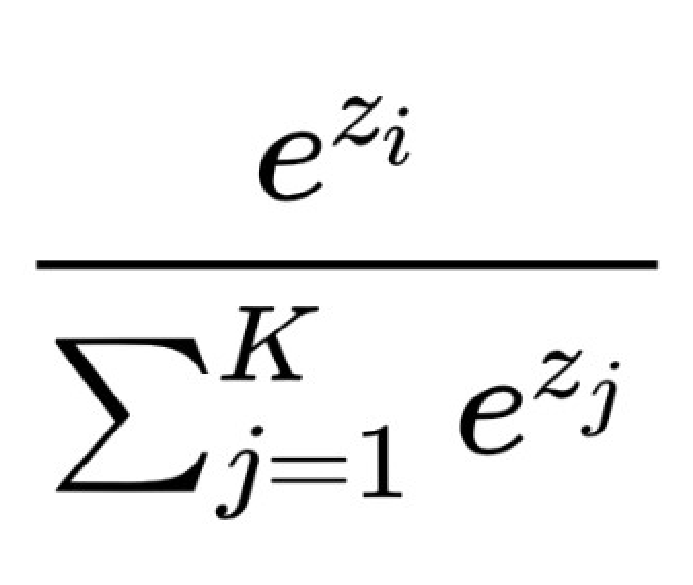 

For multiclass classification we use softmax Activation function

In [26]:
#Dependencies
import keras
from keras.models import Sequential
from keras.layers import Dense # for Neural network
model = Sequential()
model.add(Dense(16, input_dim=20, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(4, activation='softmax'))

Now we need to specify the loss function and the optimizer. It is done using compile function in keras.

In [27]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Let's train the model

In [28]:
trained = model.fit(X_train, y_train, epochs=100, batch_size=64)

Epoch 1/100
29/29 [==============================] - 1s 1ms/step - loss: 1.4252 - accuracy: 0.2702
Epoch 2/100
29/29 [==============================] - 0s 1ms/step - loss: 1.3583 - accuracy: 0.3469
Epoch 3/100
29/29 [==============================] - 0s 1ms/step - loss: 1.2953 - accuracy: 0.4222
Epoch 4/100
29/29 [==============================] - 0s 1ms/step - loss: 1.2397 - accuracy: 0.4690
Epoch 5/100
29/29 [==============================] - 0s 1ms/step - loss: 1.1813 - accuracy: 0.5036
Epoch 6/100
29/29 [==============================] - 0s 1ms/step - loss: 1.1054 - accuracy: 0.5424
Epoch 7/100
29/29 [==============================] - 0s 1ms/step - loss: 0.9974 - accuracy: 0.6097
Epoch 8/100
29/29 [==============================] - 0s 1ms/step - loss: 0.9349 - accuracy: 0.6177
Epoch 9/100
29/29 [==============================] - 0s 1ms/step - loss: 0.8484 - accuracy: 0.6596
Epoch 10/100
29/29 [==============================] - 0s 1ms/step - loss: 0.7577 - accuracy: 0.6936
Epoch 11/

Now our model is trained and we can check model performence in test data

In [31]:
y_pred = model.predict(X_test)
#Converting predictions to label

# The following step will reverse the one hot encoded step
pred = []
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
print(pred)
#Converting one hot encoded test label to label
test = []
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))
print(test)

[2, 0, 0, 1, 0, 1, 3, 3, 0, 2, 2, 1, 2, 0, 1, 1, 0, 3, 0, 1, 1, 1, 2, 0, 3, 0, 0, 2, 2, 2, 1, 3, 1, 2, 1, 2, 3, 1, 2, 1, 3, 0, 2, 0, 0, 0, 2, 2, 1, 3, 3, 2, 0, 3, 3, 3, 1, 3, 2, 3, 1, 1, 3, 0, 1, 2, 1, 2, 3, 1, 3, 3, 3, 0, 3, 2, 1, 1, 3, 0, 3, 3, 3, 3, 3, 1, 3, 1, 3, 2, 3, 0, 2, 3, 1, 1, 3, 0, 1, 3, 0, 0, 3, 3, 2, 2, 0, 1, 3, 0, 0, 3, 3, 1, 0, 2, 3, 1, 0, 0, 3, 0, 1, 1, 0, 2, 0, 0, 2, 3, 2, 0, 0, 3, 0, 1, 2, 1, 3, 2, 2, 1, 1, 3, 1, 2, 1, 2, 3, 0, 1, 1, 2, 1, 3, 1, 2, 2, 3, 0, 1, 1, 1, 2, 2, 0, 1, 2, 3, 2, 3, 1, 3, 1, 1, 0, 3, 1, 2, 0, 3, 3, 1, 1, 3, 1, 1, 1, 2, 0, 3, 3, 1, 3, 2, 0, 1, 2, 3, 0]
[2, 0, 0, 1, 0, 1, 3, 3, 1, 2, 2, 1, 2, 0, 1, 1, 0, 3, 0, 1, 1, 1, 2, 1, 3, 0, 0, 2, 2, 2, 1, 3, 1, 1, 0, 2, 3, 1, 2, 1, 3, 0, 2, 0, 1, 0, 2, 2, 1, 3, 3, 2, 0, 2, 3, 3, 1, 3, 2, 3, 1, 1, 3, 0, 1, 2, 1, 2, 3, 1, 3, 3, 3, 0, 3, 2, 1, 1, 2, 0, 3, 3, 3, 3, 3, 1, 3, 1, 3, 2, 3, 1, 2, 3, 1, 1, 3, 0, 1, 3, 0, 0, 3, 3, 2, 2, 0, 1, 3, 0, 0, 3, 3, 1, 1, 2, 3, 1, 0, 0, 3, 0, 1, 1, 0, 2, 0, 0, 2, 3, 2, 0, 0,

In [32]:
from sklearn.metrics import accuracy_score
a = accuracy_score(pred,test)
print('Accuracy is:', a*100)

Accuracy is: 92.0


Lets check the accuracy of after every step of training

In [33]:
trained2 = model.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=100, batch_size=64)

Epoch 1/100
29/29 [==============================] - 0s 15ms/step - loss: 0.0446 - accuracy: 0.9928 - val_loss: 0.2069 - val_accuracy: 0.9200
Epoch 2/100
29/29 [==============================] - 0s 3ms/step - loss: 0.0435 - accuracy: 0.9933 - val_loss: 0.2041 - val_accuracy: 0.9150
Epoch 3/100
29/29 [==============================] - 0s 3ms/step - loss: 0.0432 - accuracy: 0.9933 - val_loss: 0.2035 - val_accuracy: 0.9200
Epoch 4/100
29/29 [==============================] - 0s 3ms/step - loss: 0.0426 - accuracy: 0.9933 - val_loss: 0.2067 - val_accuracy: 0.9200
Epoch 5/100
29/29 [==============================] - 0s 3ms/step - loss: 0.0416 - accuracy: 0.9950 - val_loss: 0.2069 - val_accuracy: 0.9200
Epoch 6/100
29/29 [==============================] - 0s 3ms/step - loss: 0.0411 - accuracy: 0.9944 - val_loss: 0.2059 - val_accuracy: 0.9200
Epoch 7/100
29/29 [==============================] - 0s 3ms/step - loss: 0.0406 - accuracy: 0.9950 - val_loss: 0.2031 - val_accuracy: 0.9150
Epoch 8/100


As we could see in pervious figure that our model contained validation accuracy also

Now lets visualise the validation loss and traing loss and validation accuacry and trainning accuracy to actuall obserb,  does our model over fitting

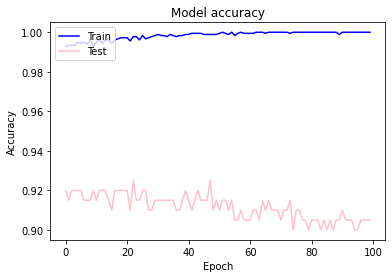

In [45]:
import matplotlib.pyplot as plt


plt.plot(trained2.history['accuracy'],color='blue')
plt.plot(trained2.history['val_accuracy'],color='pink')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()



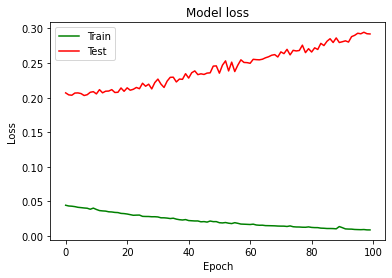

In [46]:


plt.plot(trained2.history['loss'],color='green') 
plt.plot(trained2.history['val_loss'],color='red') 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()

In [38]:
trained2.history

{'accuracy': [0.9927777647972107,
  0.9933333396911621,
  0.9933333396911621,
  0.9933333396911621,
  0.9950000047683716,
  0.9944444298744202,
  0.9950000047683716,
  0.9938889145851135,
  0.9961110949516296,
  0.9927777647972107,
  0.9950000047683716,
  0.9961110949516296,
  0.9944444298744202,
  0.9961110949516296,
  0.9961110949516296,
  0.9944444298744202,
  0.9961110949516296,
  0.996666669845581,
  0.9972222447395325,
  0.9972222447395325,
  0.9972222447395325,
  0.995555579662323,
  0.9977777600288391,
  0.9977777600288391,
  0.9961110949516296,
  0.9983333349227905,
  0.996666669845581,
  0.9972222447395325,
  0.9977777600288391,
  0.9983333349227905,
  0.9988889098167419,
  0.9983333349227905,
  0.9983333349227905,
  0.9977777600288391,
  0.9988889098167419,
  0.9983333349227905,
  0.9977777600288391,
  0.9983333349227905,
  0.9983333349227905,
  0.9988889098167419,
  0.9988889098167419,
  0.9994444251060486,
  0.9994444251060486,
  0.9994444251060486,
  0.9994444251060486,
 